# Lesson 1 - African vs. Asian

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [23]:
folder='asian'
file='asian.txt'

In [30]:
folder='african'
file='african.txt'

In [10]:
path = Path('data/elephants')

In [ ]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [34]:
path.ls()

[PosixPath('data/elephants/asian.txt'),
 PosixPath('data/elephants/.ipynb_checkpoints'),
 PosixPath('data/elephants/african.txt'),
 PosixPath('data/elephants/african'),
 PosixPath('data/elephants/asian')]

In [35]:
folder

'african'

In [36]:
classes=['african', 'asian']

In [38]:
download_images(path/file, dest, max_pics=200)

In [39]:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [40]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)
    

african


cannot identify image file <_io.BufferedReader name='data/elephants/african/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='data/elephants/african/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/elephants/african/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='data/elephants/african/00000023.jpg'>
asian


cannot identify image file <_io.BufferedReader name='data/elephants/asian/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='data/elephants/asian/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='data/elephants/asian/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='data/elephants/asian/00000048.jpg'>


In [41]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [42]:
data.classes

['african', 'asian']

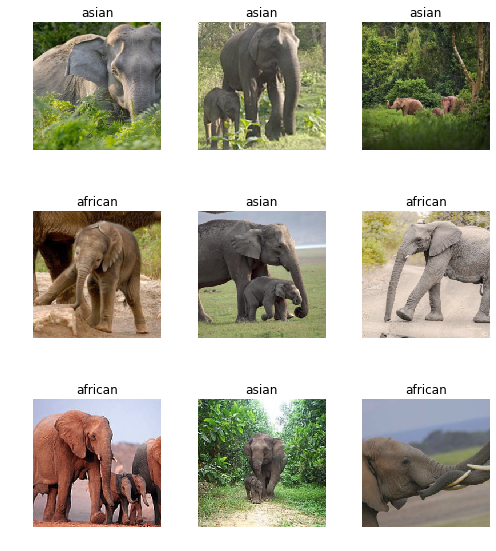

In [43]:
data.show_batch(rows=3, figsize=(7,8))

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['african', 'asian'], 2, 153, 38)

Train Model

learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [47]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [48]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,0.886647,0.501167,0.184211,00:05
2,0.721051,0.276370,0.105263,00:02
3,0.619871,0.241472,0.078947,00:02
4,0.552931,0.233903,0.078947,00:02


In [49]:
learn.save('stage-1')

### Results

In [50]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [ ]:
load('stage-1')

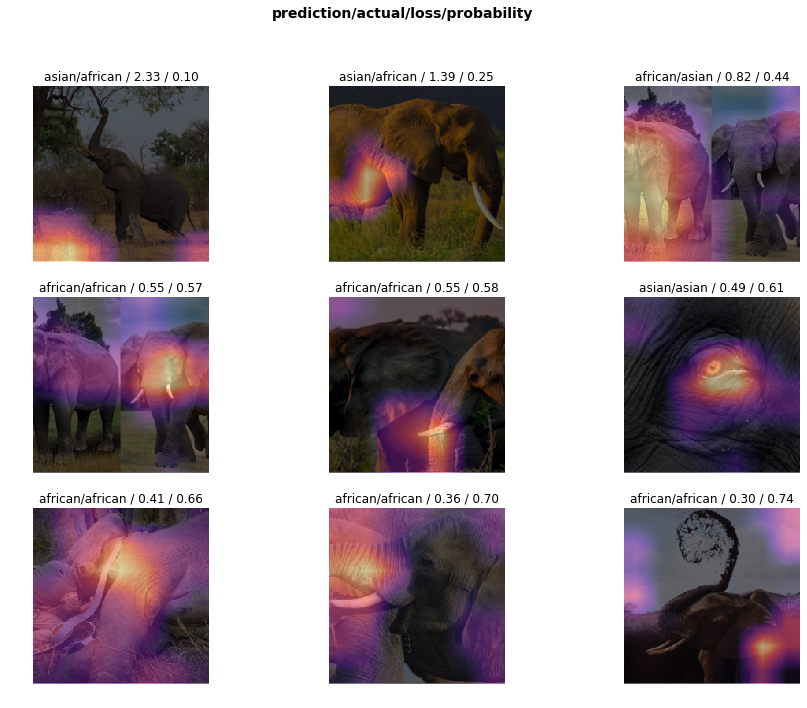

In [51]:
interp.plot_top_losses(9, figsize=(15,11))

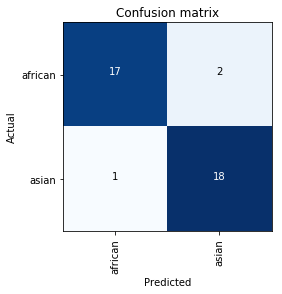

In [52]:
interp.plot_confusion_matrix()

In [53]:
interp.most_confused(min_val=2)

[('african', 'asian', 2)]

# Unfreezing, tuning, learning rates

In [5]:
learn.unfreeze()

NameError: name 'learn' is not defined

In [55]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
1,0.368166,0.252440,0.105263,00:02


In [56]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (153 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
african,african,african,african,african
Path: data/elephants;

Valid: LabelList (38 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
asian,african,asian,african,african
Path: data/elephants;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


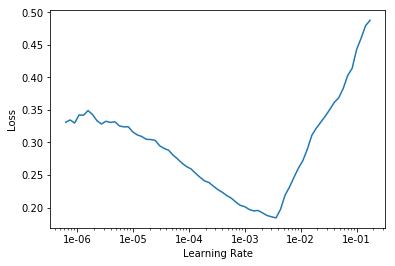

In [59]:
learn.recorder.plot()

In [60]:
learn.unfreeze()

In [61]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
1,0.304662,0.221127,0.078947,00:02
2,0.290904,0.207812,0.078947,00:02


# Training resnet 50

In [11]:
bs=16
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=100).normalize(imagenet_stats)

In [12]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


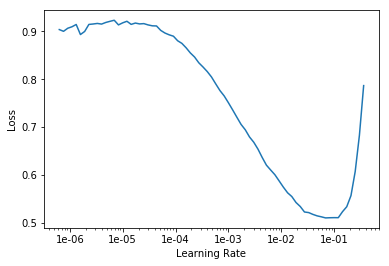

In [64]:
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.save('stage-1-50')

In [13]:
learn.unfreeze()
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
1,0.866235,0.669140,0.394737,00:07
2,0.717540,0.483359,0.210526,00:01
3,0.648283,0.542503,0.236842,00:01
4,0.548865,0.989944,0.236842,00:01
5,0.490365,0.632524,0.184211,00:01
6,0.429112,0.357946,0.184211,00:01
7,0.385805,0.336911,0.105263,00:01
8,0.353060,0.361690,0.131579,00:01


In [68]:
learn.load('stage-1-50');

In [69]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.908759,0.944778,0.500000,00:01
2,0.892916,0.890501,0.500000,00:01
3,0.867271,0.861898,0.473684,00:01


In [70]:
interp = ClassificationInterpretation.from_learner(learn)

In [71]:
interp.most_confused(min_val=2)

[('african', 'asian', 17)]

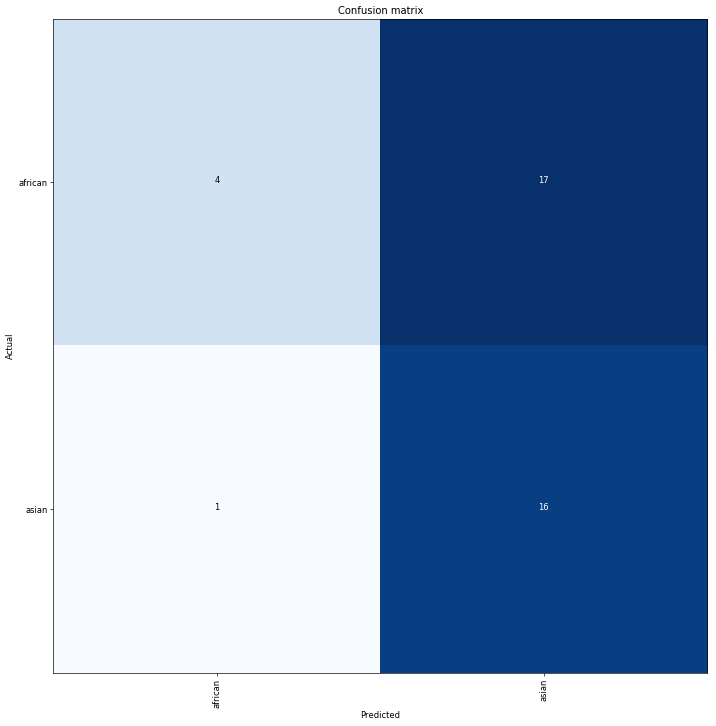

In [72]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [55]:
help(fit_one_cycle)


Help on function fit_one_cycle in module fastai.train:

fit_one_cycle(learn: fastai.basic_train.Learner, cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = 1) -> None
    Fit a model following the 1cycle policy.



In [7]:
import uvicorn
uvicorn example:App

SyntaxError: invalid syntax (<ipython-input-7-0e4e114b5135>, line 2)

In [6]:
from starlette.applications import Starlette
from starlette.responses import JSONResponse
import uvicorn

app = Starlette(debug=True)

@app.route('/classify-url')
async def clasify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions" : sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })

In [14]:
example.py

NameError: name 'example' is not defined

In [2]:
help(Starlette.route)

Help on function route in module starlette.applications:

route(self, path: str, methods: List[str] = None, name: str = None, include_in_schema: bool = True) -> Callable

